In [1]:
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import pandas as pd
import matplotlib  
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import numpy as np


## Import Data

In [30]:
tweets = pd.read_csv('seacabo_2023.csv')
tweets['timestamp'] = pd.to_datetime(tweets['timestamp'])

#tweets = df['text'].tolist()
len(tweets)

20291

## Procesado de Datos

In [31]:
# descargamos datasets en español para preprocesado del texto
nltk.download('stopwords')
nltk.download('punkt')

def remove_spanish_stopwords(text):
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    
    spanish_stopwords = set(stopwords.words('spanish'))
    spanish_stopwords.remove("no")  # Keep the word "no" in the text
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.lower() not in spanish_stopwords]
    return ' '.join(filtered_words)  # Joining the words back into a string



tweets['text proc'] = tweets['text'].apply(remove_spanish_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jorge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jorge\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [32]:
# ejemplo de datos
tweets.head()

,Unnamed: 0,tweet_avatar,tweet_id,url,query,text,username,fullname,timestamp,language,...,likes,banner_image,total_tweets,num_following,num_followers,total_likes,tweet_links,tweet_hashtags,tweet_mentions,text proc
0,0,https://pbs.twimg.com/profile_images/170563079...,1609386752392982528,https://twitter.com/TitoHerrera/status/1609386...,#seacabó OR #seacabo since:2023-1-1 until:2023...,"Este año 2022, a principios de año me propuse ...",@TitoHerrera,Tito Herrera,2023-01-01 03:11:00+00:00,NaN,...,1,NaN,NaN,NaN,NaN,NaN,[],"['#buenaño', '#seacabo', '#metas', '#seguimos']",[],año 2022 principios año propuse meta perder 20...
1,1,https://pbs.twimg.com/profile_images/165415448...,1609342355001466882,https://twitter.com/nachoacantautor/status/160...,#seacabó OR #seacabo since:2023-1-1 until:2023...,"Gracias Dios, año 2022, familia y amigos (nuev...",@nachoacantautor,Nacho Acuña,2023-01-01 00:14:00+00:00,NaN,...,0,NaN,NaN,NaN,NaN,NaN,[],"['#felizañonuevo2023', '#seacabo', '#agradecid...",[],gracias dios año 2022 familia amigos nuevos an...
2,2,https://pbs.twimg.com/profile_images/922539646...,1609925152808001541,https://twitter.com/delrecords/status/16099251...,#seacabó OR #seacabo since:2023-1-2 until:2023...,Sigue pidiendo #SeAcabo en tu radio favorita 📻...,@delrecords,DEL Records,2023-01-02 14:50:00+00:00,NaN,...,0,NaN,NaN,NaN,NaN,NaN,[],"['#SeAcabo', '#LeninRamirez', '#DELRecords']",[],sigue pidiendo seacabo radio favorita 📻🔥🎵📲 len...
3,3,https://pbs.twimg.com/profile_images/171403345...,1609737894159163394,https://twitter.com/canquesruiz/status/1609737...,#seacabó OR #seacabo since:2023-1-2 until:2023...,Primer día del #Año2023...#seacabo.,@canquesruiz,miguel angel ruiz,2023-01-02 02:26:00+00:00,NaN,...,1,NaN,NaN,NaN,NaN,NaN,[],"['#Año2023', '#seacabo']",[],primer día año2023seacabo
4,4,https://pbs.twimg.com/profile_images/167519772...,1610424805077184512,https://twitter.com/hugo_vaargas/status/161042...,#seacabó OR #seacabo since:2023-1-3 until:2023...,Igual de inútil que mi ultimo intento de relac...,@hugo_vaargas,HUGOVAARGAS,2023-01-03 23:56:00+00:00,NaN,...,0,NaN,NaN,NaN,NaN,NaN,[],['#seacabo'],[],igual inútil ultimo intento relación hoy tire ...


In [33]:
from gensim.models.fasttext import FastText

# Create a FastText model
sentences = tweets['text proc'].str.split().tolist()
embedding_size = 100  # you can adjust this value as needed
model = FastText(sentences, vector_size=embedding_size, window=5, min_count=1, workers=4, sg=1, epochs=10)

# Convert text data into FastText embeddings
def text_to_vector(text):
    words = text.split()
    vector = np.mean([model.wv[word] for word in words if word in model.wv.index_to_key], axis=0)
    return vector

tweets['text vect'] = tweets['text proc'].apply(text_to_vector)

X = np.stack(tweets['text vect'].values)
#y = df['Rating Local'].values

tweets.head()

,Unnamed: 0,tweet_avatar,tweet_id,url,query,text,username,fullname,timestamp,language,...,banner_image,total_tweets,num_following,num_followers,total_likes,tweet_links,tweet_hashtags,tweet_mentions,text proc,text vect
0,0,https://pbs.twimg.com/profile_images/170563079...,1609386752392982528,https://twitter.com/TitoHerrera/status/1609386...,#seacabó OR #seacabo since:2023-1-1 until:2023...,"Este año 2022, a principios de año me propuse ...",@TitoHerrera,Tito Herrera,2023-01-01 03:11:00+00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,[],"['#buenaño', '#seacabo', '#metas', '#seguimos']",[],año 2022 principios año propuse meta perder 20...,"[0.5164043, 0.20603506, 0.12857926, 0.21392079..."
1,1,https://pbs.twimg.com/profile_images/165415448...,1609342355001466882,https://twitter.com/nachoacantautor/status/160...,#seacabó OR #seacabo since:2023-1-1 until:2023...,"Gracias Dios, año 2022, familia y amigos (nuev...",@nachoacantautor,Nacho Acuña,2023-01-01 00:14:00+00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,[],"['#felizañonuevo2023', '#seacabo', '#agradecid...",[],gracias dios año 2022 familia amigos nuevos an...,"[0.4717646, 0.3036239, -0.001891203, 0.2243815..."
2,2,https://pbs.twimg.com/profile_images/922539646...,1609925152808001541,https://twitter.com/delrecords/status/16099251...,#seacabó OR #seacabo since:2023-1-2 until:2023...,Sigue pidiendo #SeAcabo en tu radio favorita 📻...,@delrecords,DEL Records,2023-01-02 14:50:00+00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,[],"['#SeAcabo', '#LeninRamirez', '#DELRecords']",[],sigue pidiendo seacabo radio favorita 📻🔥🎵📲 len...,"[0.40249947, 0.3126227, 0.20573096, -0.0195761..."
3,3,https://pbs.twimg.com/profile_images/171403345...,1609737894159163394,https://twitter.com/canquesruiz/status/1609737...,#seacabó OR #seacabo since:2023-1-2 until:2023...,Primer día del #Año2023...#seacabo.,@canquesruiz,miguel angel ruiz,2023-01-02 02:26:00+00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,[],"['#Año2023', '#seacabo']",[],primer día año2023seacabo,"[0.55974084, 0.5588887, -0.0067388862, 0.28903..."
4,4,https://pbs.twimg.com/profile_images/167519772...,1610424805077184512,https://twitter.com/hugo_vaargas/status/161042...,#seacabó OR #seacabo since:2023-1-3 until:2023...,Igual de inútil que mi ultimo intento de relac...,@hugo_vaargas,HUGOVAARGAS,2023-01-03 23:56:00+00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,[],['#seacabo'],[],igual inútil ultimo intento relación hoy tire ...,"[0.29701886, 0.24945071, 0.23417962, 0.1674202..."


c:\Users\jorge\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 128156 (\N{PURPLE HEART}) missing from current font.



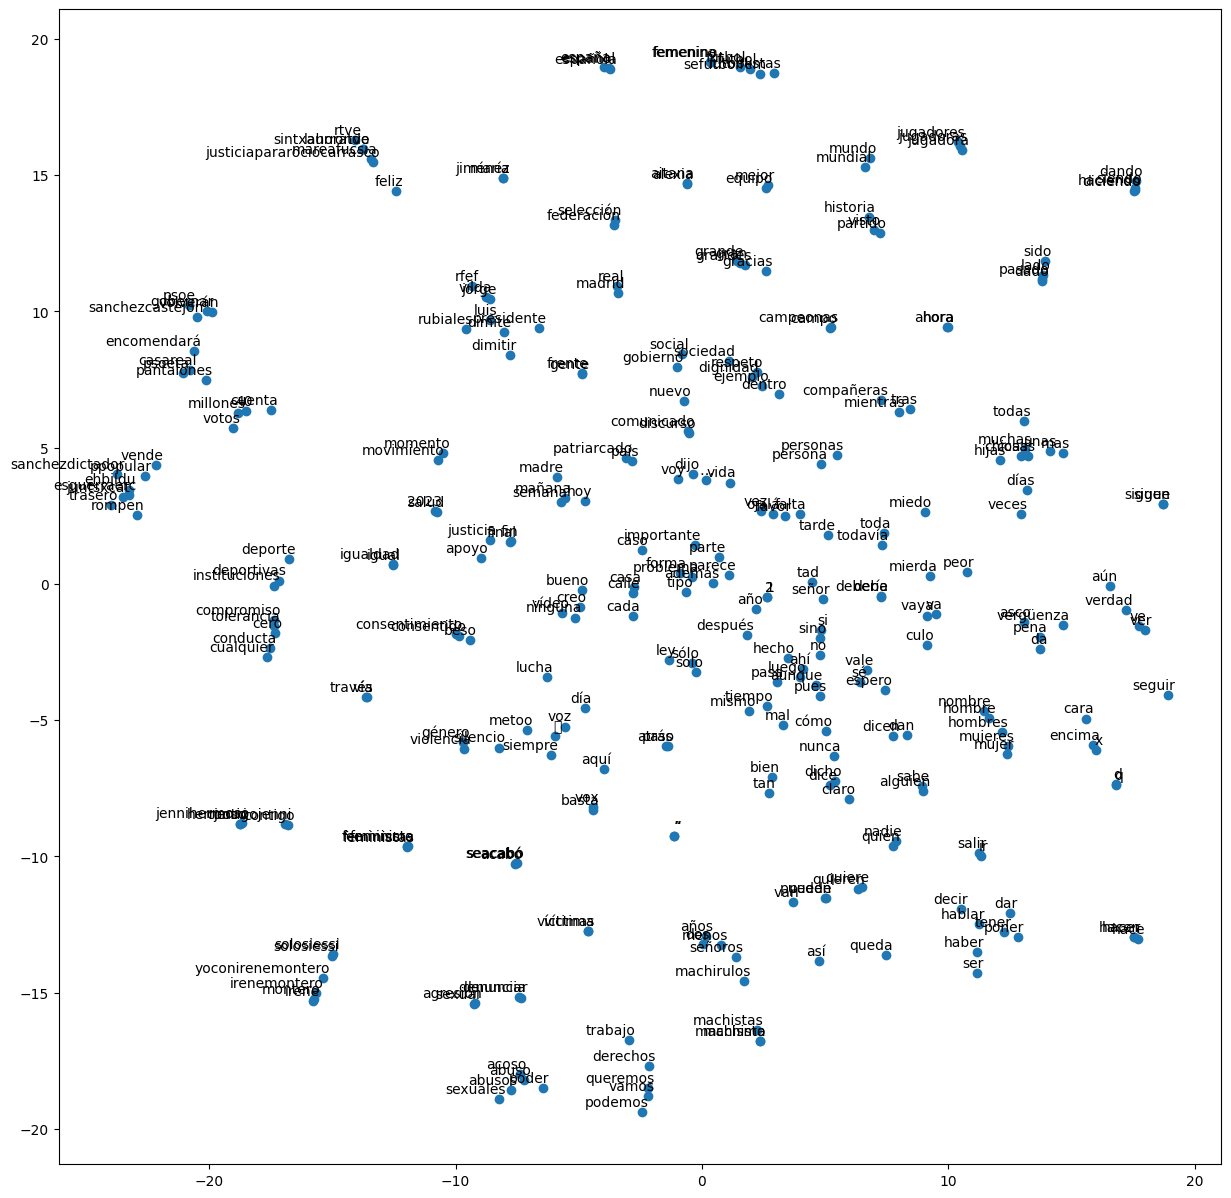

In [34]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


# Assuming 'model' is your trained FastText model
words = list(model.wv.index_to_key) [:300]  # Taking the first 200 words for visualization
vectors = np.array([model.wv[word] for word in words])


tsne = TSNE(n_components=2, random_state=42, n_iter=300, perplexity=5)
tsne_results = tsne.fit_transform(vectors)


plt.figure(figsize=(15, 15))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])

# Annotate each point with its corresponding word
for i, word in enumerate(words):
    plt.annotate(word, xy=(tsne_results[i, 0], tsne_results[i, 1]), xytext=(5, 2), 
                 textcoords='offset points', ha='right', va='bottom', fontsize=10)

plt.show()

In [35]:
import plotly.express as px
import nbformat
print(nbformat.__version__)

# Assuming 'model' is your trained FastText model
words = list(model.wv.index_to_key)[:300]  # Taking the first 300 words for visualization
vectors = np.array([model.wv[word] for word in words])

# Update TSNE to 3 components for 3D visualization
tsne = TSNE(n_components=3, random_state=42, n_iter=300, perplexity=5)
tsne_results = tsne.fit_transform(vectors)

# Convert results into a DataFrame for easier plotting with plotly
import pandas as pd
df = pd.DataFrame(tsne_results, columns=['x', 'y', 'z'])
df['word'] = words

# Create interactive 3D scatter plot using plotly
fig = px.scatter_3d(df, x='x', y='y', z='z', text='word')

# Show the plot
fig.show()

5.7.3


### Name-Entity Recognition (NER):

In [49]:
!python -m spacy download es_core_news_sm
!python -m spacy download es_dep_news_trf

In [48]:
import spacy

nlp = spacy.load('es_dep_news_trf')

def named_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities


named_entities(tweets['text'].iloc[68])

[('Rafa', 'LOC')]

### Topic Modelling

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

def topics_lda(texts, n_topics=5, n_words=5):
    vectorizer = CountVectorizer(stop_words='english')
    data_vectorized = vectorizer.fit_transform(texts)
    lda = LatentDirichletAllocation(n_components=n_topics)
    lda.fit(data_vectorized)
    topics = []
    for idx, topic in enumerate(lda.components_):
        topics.append([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-n_words:]])
    return topics